# Names and Roll Numbers of Group member:

CS - 19137 : Syed Muhammad Taha, 
CS - 19138 : Muhammad Nayalish Naseem, 
CS - 19149 Muhammad Hammad Altaf Hussain.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from collections import OrderedDict

Reading and storing Dataset "The_Grades_Dataset.csv" to varibale df.

In [2]:
df = pd.read_csv('The_Grades_Dataset.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


Seeing unique values in every column of our dataframe.

In [3]:
columns_name = df.columns
for i in columns_name:
    if i == 'CGPA':
        break
    elif i == 'Seat No.':
        pass
    else:
        print(f"Unique entries in column {i} are: {df[i].unique()}")

Unique entries in column PH-121 are: ['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']
Unique entries in column HS-101 are: ['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']
Unique entries in column CY-105 are: ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' nan 'WU' 'A+' 'F']
Unique entries in column HS-105/12 are: ['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' nan 'WU' 'A+' 'F']
Unique entries in column MT-111 are: ['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' nan 'A+' 'F' 'WU']
Unique entries in column CS-105 are: ['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']
Unique entries in column CS-106 are: ['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' nan 'A+' 'F' 'WU']
Unique entries in column EL-102 are: ['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' nan 'A+' 'WU' 'F']
Unique entries in column EE-119 are: ['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' nan 'A+']
Unique entries in column ME-107 are: ['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' nan 'F' 'A+

# Encoding and Feature Engineering:
### Encoding:
    We are encoding our data using NED University of Engineering and Technology's GPA criteria.
    
### Feature Engineering:
    First of all we see there are a lot of missing values in given dataset and that's a big problem and we have to solve it somehow.
#### Filling missing values:
    We are using forward and backward filling method for dealing with missing values.
#### Unncessary Featues:
    In our given dataset, we have to predict CGPA of particular student and there is no impact of student's seat number/roll number on CGPA. Therefore, we are dropping this feature.

In [4]:
df1 = df.replace({'A+' : 4.0, 'A' : 4.0, 'A-' : 3.7, 'B+' : 3.4, 'B' : 3.0, 'B-' : 2.7, 'C+' : 2.4, 'C' : 2.0, 'C-' : 1.7, 'D+' : 1.4, 'D' : 1.0, 'F' : 0.0, 'WU' : 0.0, 'W' : 0.0, 'I' : 0.0})
df1.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [5]:
print(df1.columns[df1.isnull().any()])
df1.isna().sum()

Index(['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
       'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303',
       'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318',
       'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414',
       'CS-419', 'CS-423', 'CS-412'],
      dtype='object')


Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [6]:
df1 = df1.replace('', np.nan)

df1 = df1.ffill().bfill()

In [7]:
df1.columns[df1.isnull().any()]

Index([], dtype='object')

In [8]:
df1.columns[df1.isna().any()]

Index([], dtype='object')

In [9]:
df1 = df1.drop(['Seat No.'],axis = 1)
df1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


### Plotting every feature column against target column (CGPA)

In [10]:
columns_name_modified = df1.columns
columns_name_modified

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

## Scatter plot:
    Courses and their respective Grade Points scatter graph:

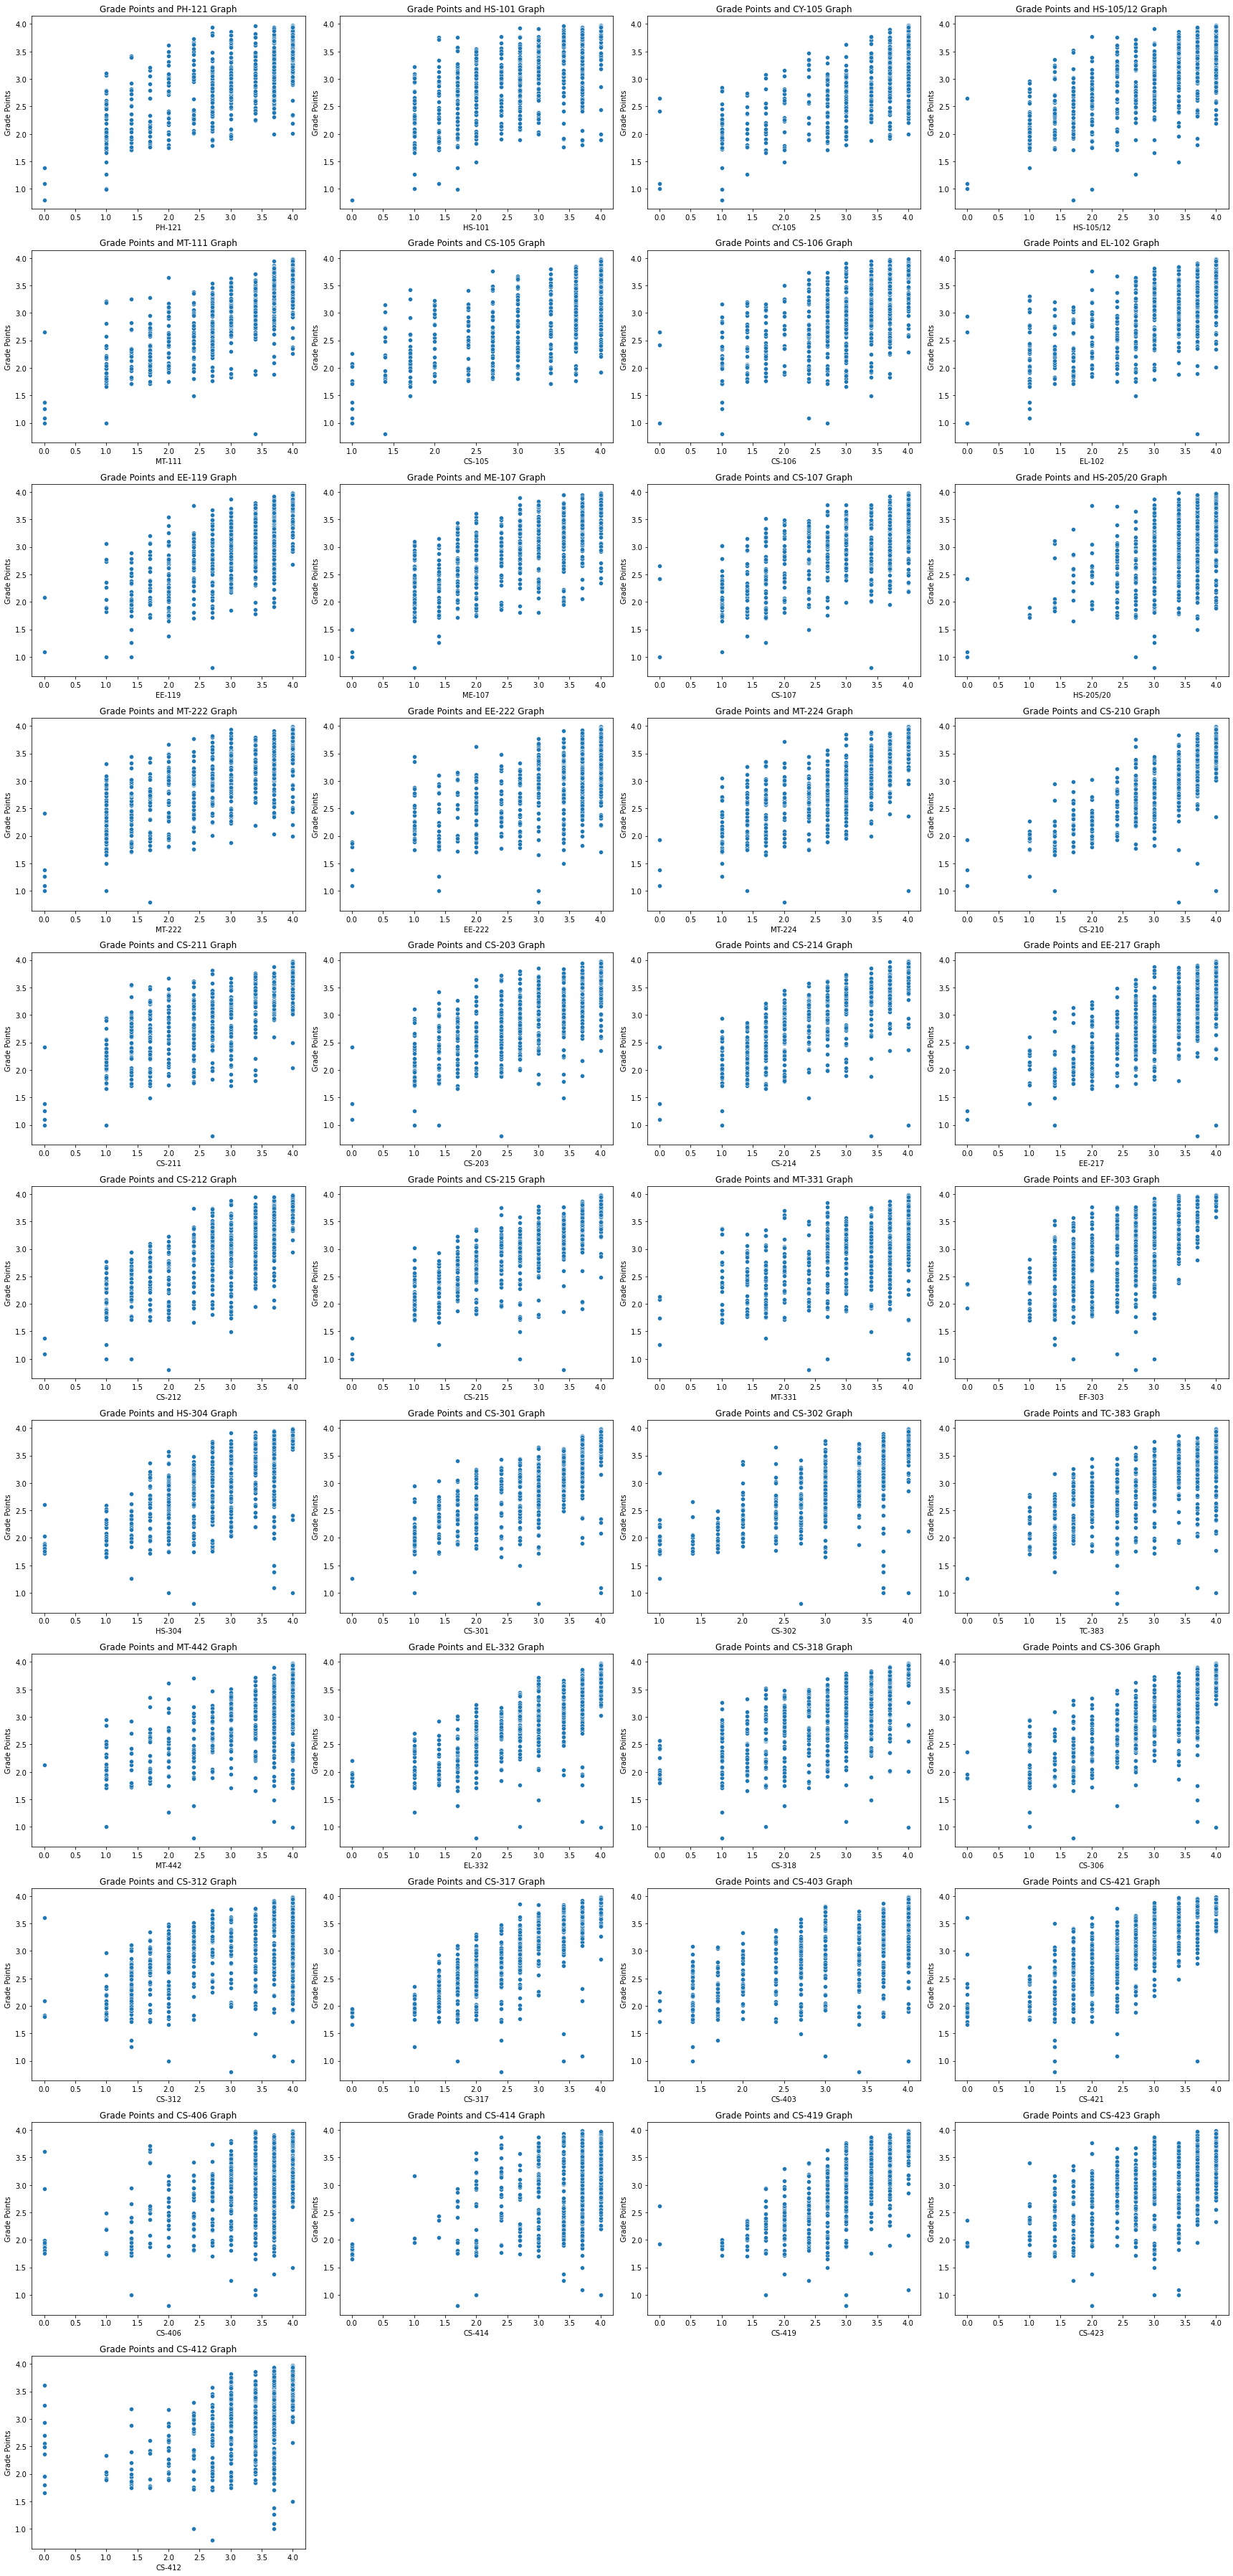

In [11]:
k = 1
fig = plt.subplots(figsize = (24, 50))
for i, j in enumerate(columns_name):
    if i == 41:
        break
    else:
        plt.subplot(11,4, k)
        sns.scatterplot(data = df1, x = df1.columns[i], y = df1.columns[41])
        plt.xlabel(columns_name_modified[i])
        plt.ylabel('Grade Points')
        plt.title(f'Grade Points and {columns_name_modified[i]} Graph')
        k = k + 1
plt.tight_layout()
plt.show()

## Count plot:
    Courses and their respective Grade Points count graph.

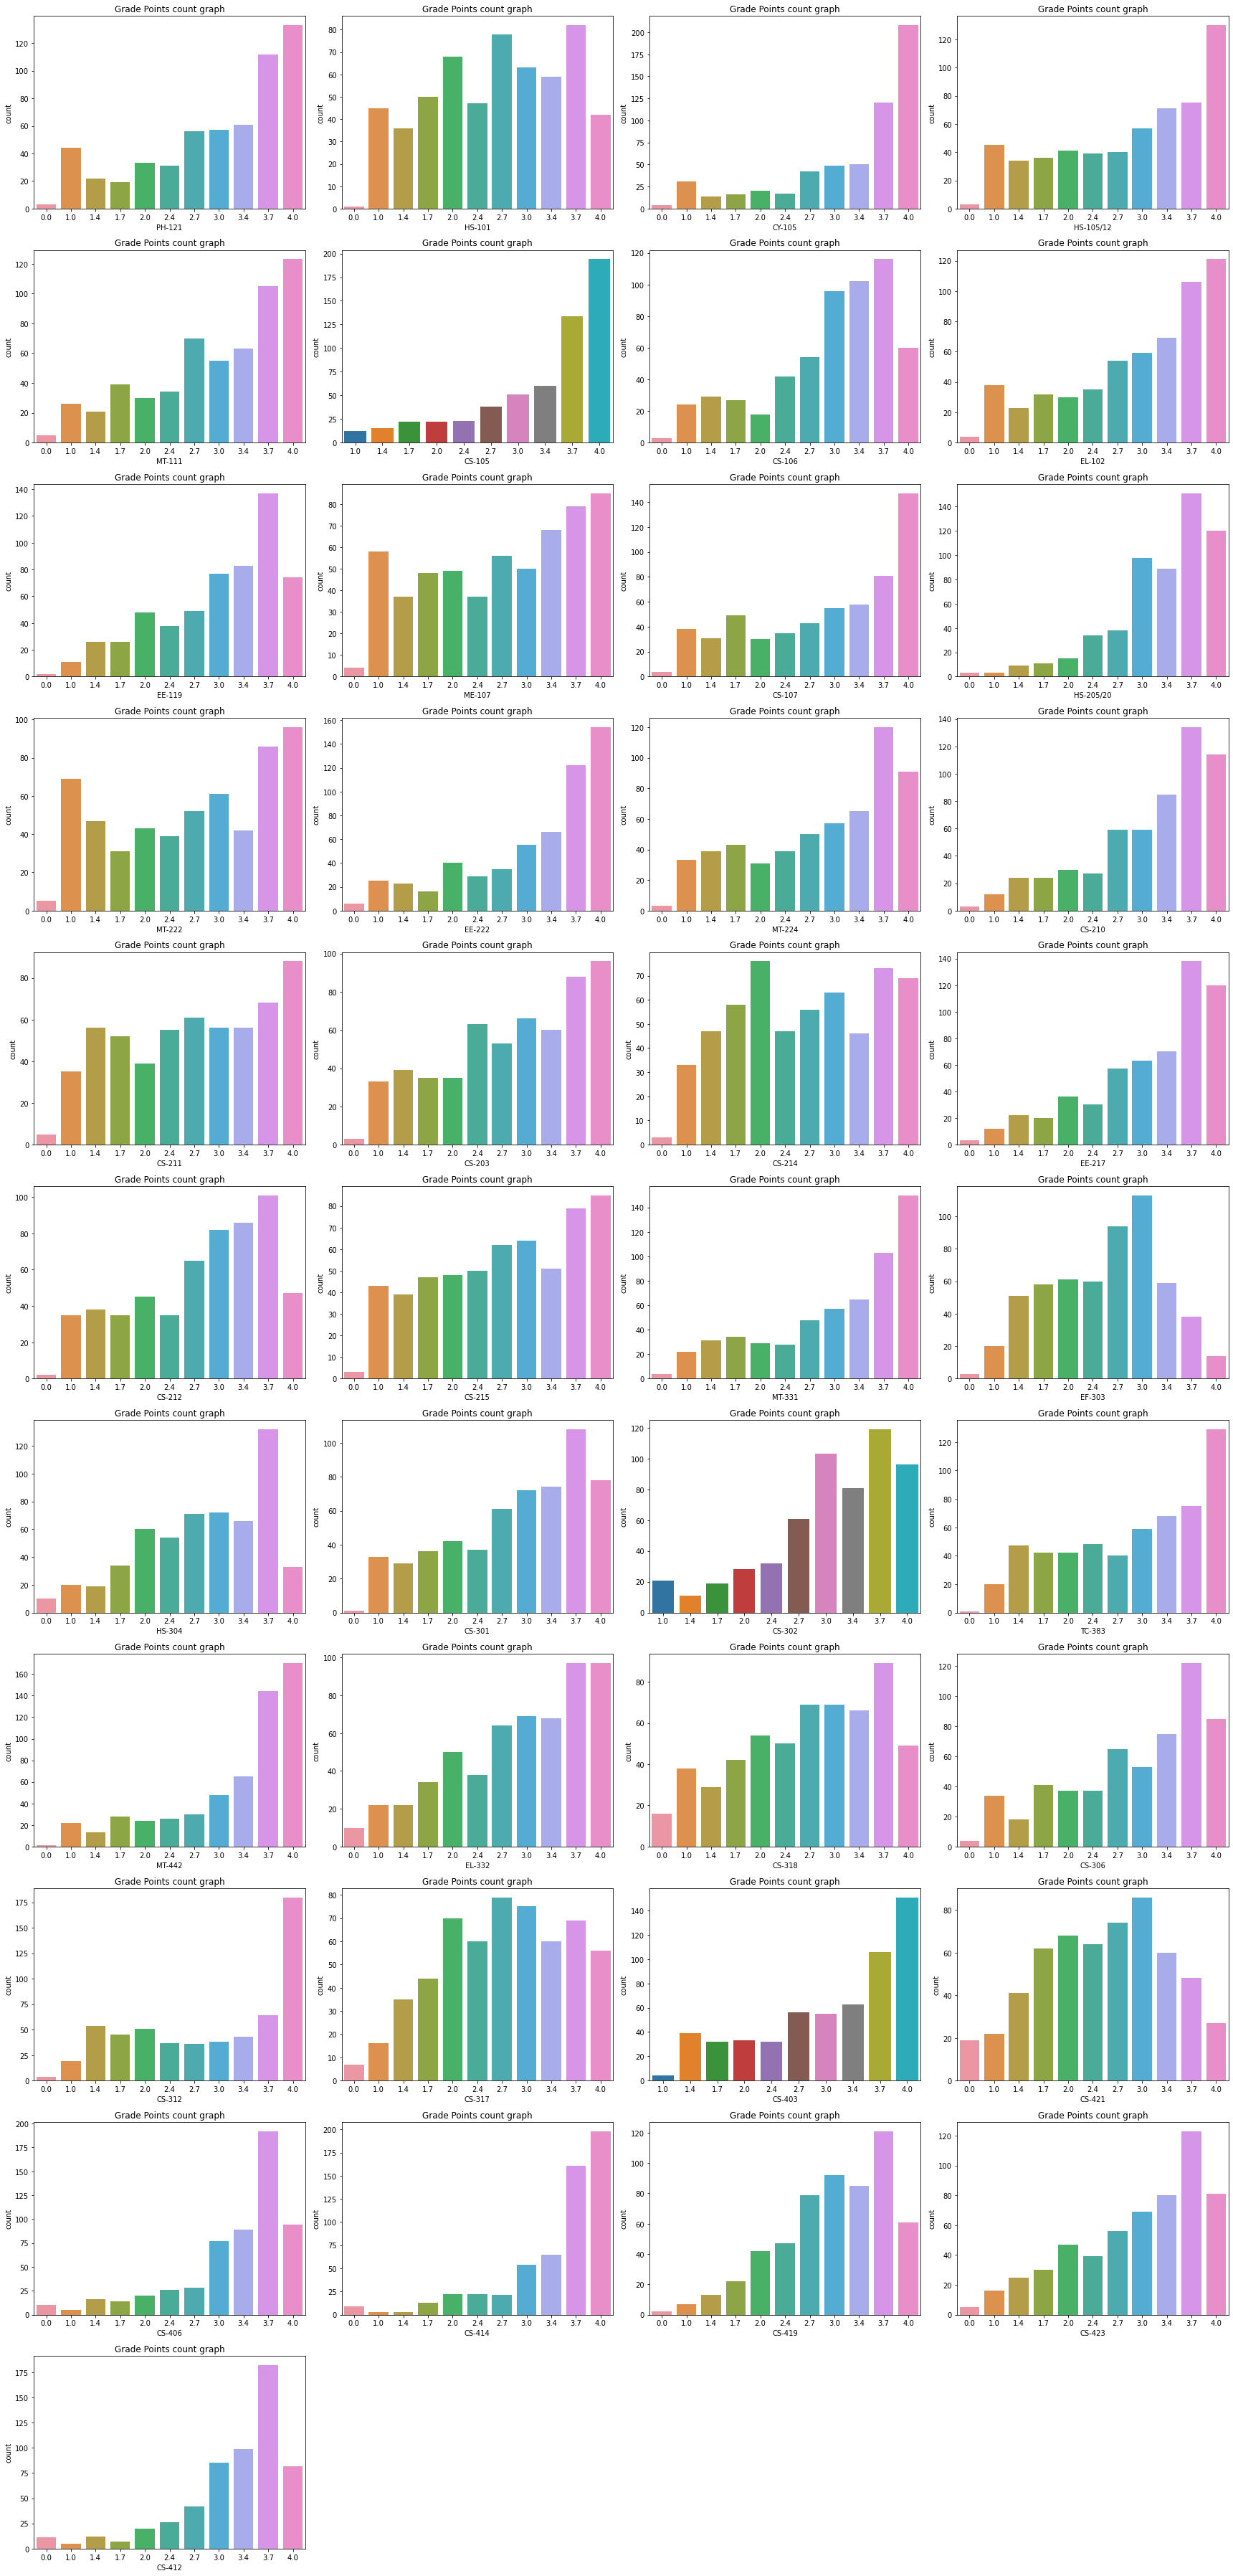

In [12]:
warnings.filterwarnings('ignore')

l = 1
fig = plt.subplots(figsize = (24, 50))
for i, j in enumerate(columns_name):
    if i == 41:
        break
    else:
        plt.subplot(11,4, l)
        sns.countplot(df1[columns_name_modified[i]])
        plt.title("Grade Points count graph")
        l = l + 1
plt.tight_layout()
plt.show()

## Creating different models (Dataframe):
###### 1st year model:

In [13]:
df1_1st_year = df1.drop(df1.columns[[range(11,41)]], axis = 1)
df1_1st_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0,3.448


###### 2nd year model:

In [14]:
df_2nd_year = df1.drop(df1.columns[[range(22,41)]], axis = 1)
df_2nd_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7,3.448


###### 3rd year model:

In [15]:
df_3rd_year = df1.drop(df1.columns[range(34,41)], axis = 1)
df_3rd_year = df_3rd_year.drop(['MT-442'], axis = 1)
df_3rd_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4,3.448


#### Algoritms that we will use:

In [16]:
algo_to_use = np.array(['Linear Regression', 'KNN Regressor', 'Polynimial Regression',
                          'Sum Vector Regressor', 'Decision Tree Regression', 'Multi Layer Perceptron'])

## Finding Correlation of Features to Output variable:

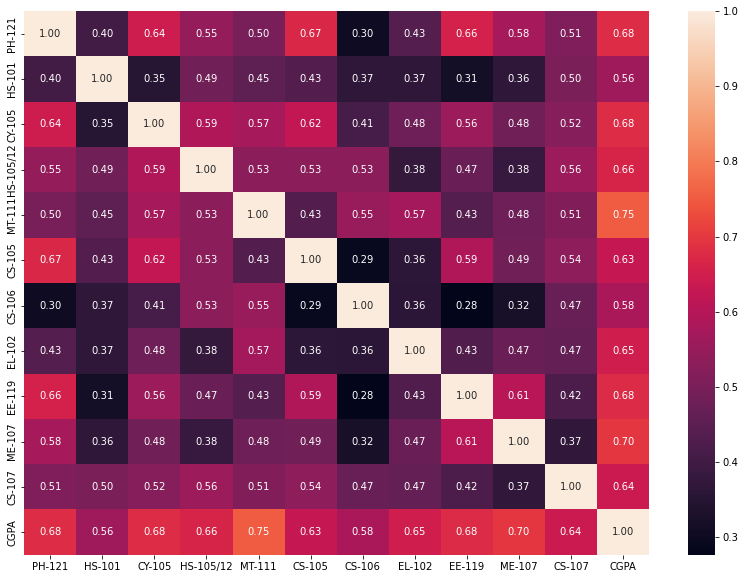

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(df1_1st_year.corr(),annot=True,fmt='.2f')
plt.show()

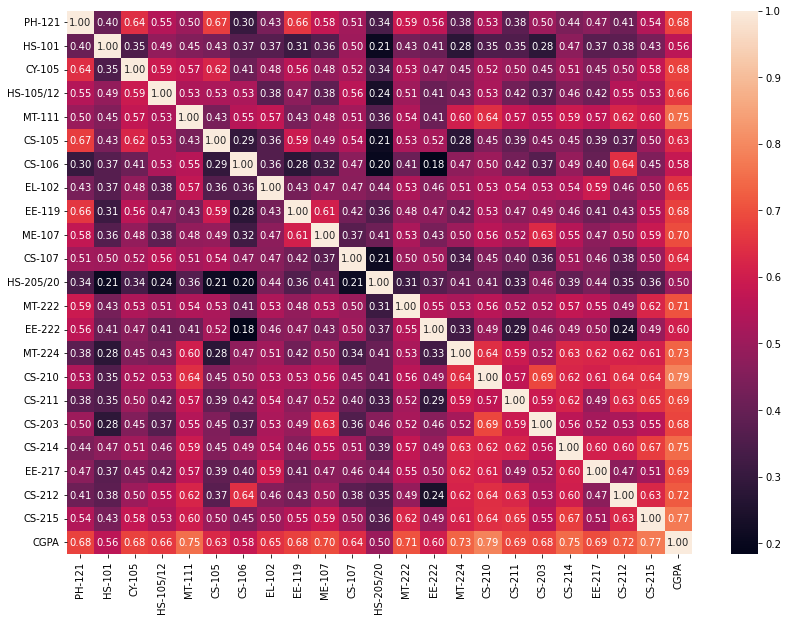

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df_2nd_year.corr(),annot=True,fmt='.2f')
plt.show()

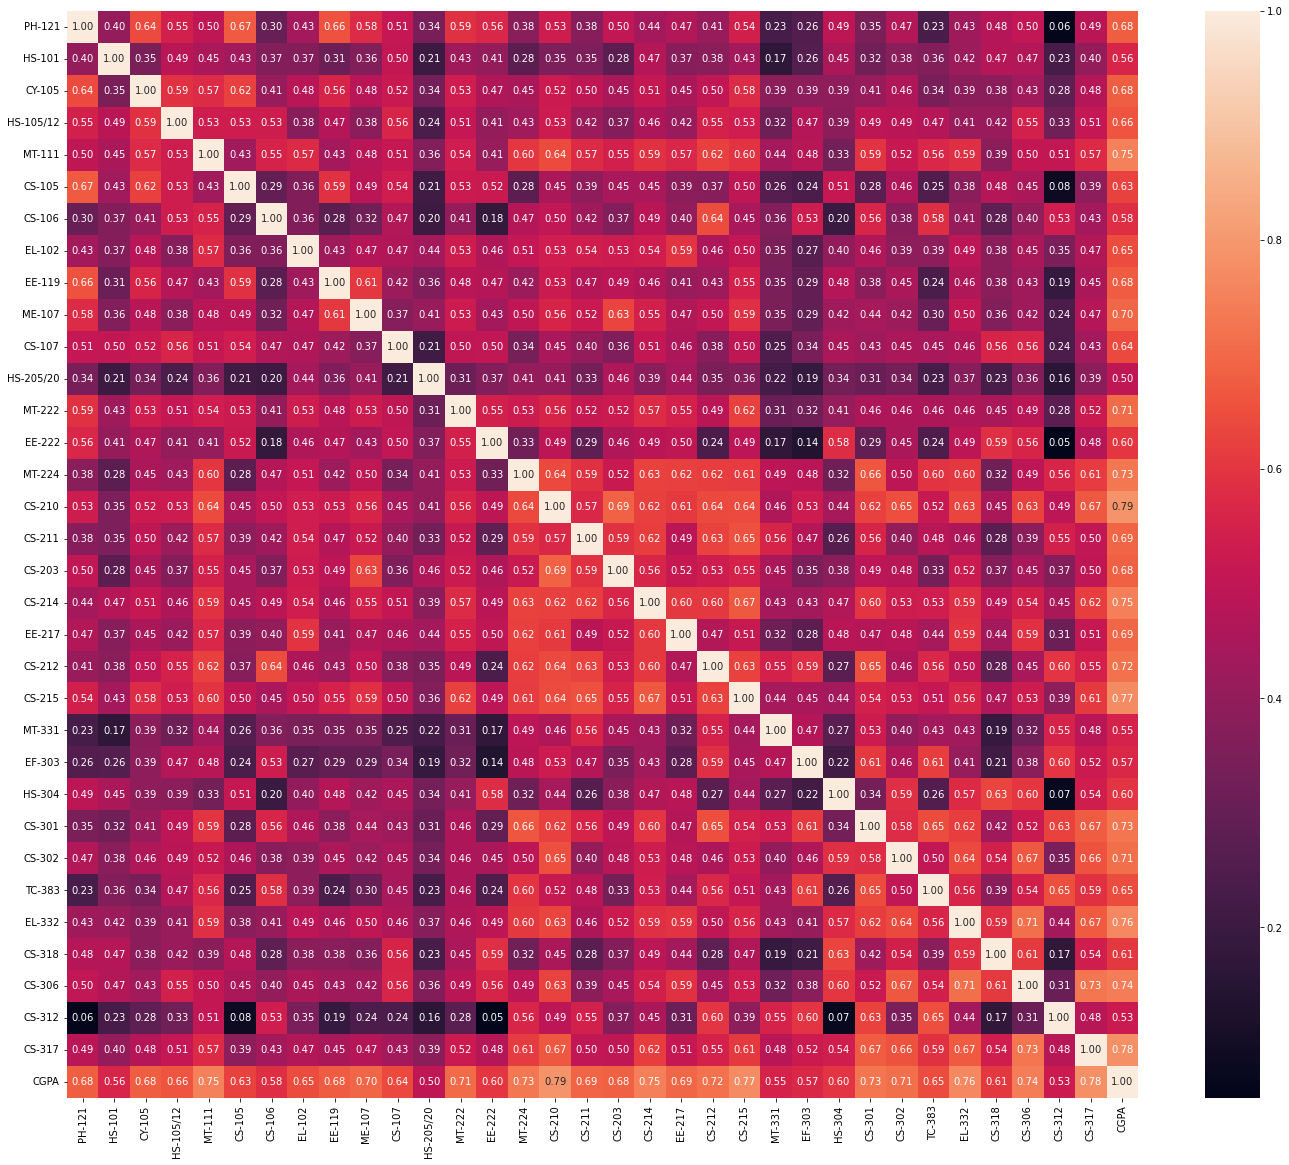

In [19]:
plt.figure(figsize=(24,20))
sns.heatmap(df_3rd_year.corr(),annot=True,fmt='.2f')
plt.show()

###### Initializing 3 lists which will contain errors of algorithms

In [20]:
mean_square_error = []
root_mean_square_error = []
mean_abs_error = []

###### Defining a function here for measuring how well our algorithm performed.

In [21]:
def performance_measure(actual_target, predicted_target, index):
    mse = round((mean_squared_error(actual_target, predicted_target)*100), 3)
    rmse = round((mean_squared_error(actual_target, predicted_target, squared = False)*100), 3)
    mae = round((mean_absolute_error(actual_target, predicted_target)*100), 3)
    
    mean_square_error.append(mse)
    root_mean_square_error.append(rmse)
    mean_abs_error.append(mae)
    
    print(f'The r2_score of {algo_to_use[index]} is: {round((r2_score(actual_target, predicted_target)*100), 3)}')
    print(f'The mean square error of {algo_to_use[index]} is: {mse}')
    print(f'The root mean square error of {algo_to_use[index]} is: {rmse}')
    print(f'The mean absolute error of {algo_to_use[index]} is: {mae}')

###### Defining a function for removing item from error list if any algorithm overfit.

In [22]:
def remove_from_error_list():
    mean_square_error.pop()
    root_mean_square_error.pop()
    mean_abs_error.pop()
    print('\nThe error for last algorithm has been removed from error\'s list.')

# Appyling different Algorithms for each Model:

#### Model 1 (1st year model):

We are using two algorithms for this model.

a) Linear Regression

b) KNN Regressor

### Linear Regression:

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
target = df1_1st_year.CGPA
target

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [25]:
input1 = df1_1st_year.drop(['CGPA'],axis = 1)
input1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(input1, target, train_size=0.7,random_state = 100)

In [27]:
model0 = LinearRegression()
my_model_0 = model0.fit(X_train, y_train)

In [28]:
y_pred0 = model0.predict(X_test)

###### Our training score for Linear Regression model is:

In [29]:
model_0_train_score = model0.score(X_train, y_train)
print(model_0_train_score*100,'%')

83.22517245505828 %


###### Our testing score for Linear Regressin model is:

In [30]:
model_0_test_score = model0.score(X_test, y_test)
print(model_0_test_score*100,'%')

88.35247862300669 %


In [31]:
performance_measure(y_test, y_pred0, 0)

The r2_score of Linear Regression is: 88.352
The mean square error of Linear Regression is: 4.333
The root mean square error of Linear Regression is: 20.815
The mean absolute error of Linear Regression is: 16.145


### K Neighbors Regressor:

In [32]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
model_01 = KNeighborsRegressor(n_neighbors = 15)
my_model_01 = model_01.fit(X_train,y_train)

In [33]:
y_pred_01 = model_01.predict(X_test)

Our training score for KNN Regressor is:

In [34]:
model_01_train_score = model_01.score(X_train, y_train)
print(model_01_train_score*100,'%')

83.19233720406268 %


Our testing score for KNN Regressor is:

In [35]:
model_01_test_score = model_01.score(X_test, y_test)
print(model_01_test_score*100,'%')

83.27959904067063 %


In [36]:
performance_measure(y_test, y_pred_01, 1)

The r2_score of KNN Regressor is: 83.28
The mean square error of KNN Regressor is: 6.22
The root mean square error of KNN Regressor is: 24.94
The mean absolute error of KNN Regressor is: 18.655


#### Model 2 (2nd year model):

We are using two algorithms for this model.

a) Polynomial Regression.

b) Support Vector Regressor from Support Vector Machine.

### Polynmial Regression.

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [38]:
target1 = df_2nd_year.CGPA
target.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [39]:
input_02 = df_2nd_year.drop(['CGPA'], axis = 1)
input_02.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.0,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,2.7,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,4.0,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7


In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(input_02, target1, test_size = 0.3, random_state = 100)

In [41]:
model_02 = make_pipeline(PolynomialFeatures(degree=4),LinearRegression())
my_model_02 = model_02.fit(X_train1, y_train1)

In [42]:
y_pred_02 = model_02.predict(X_test1)

###### Our training score for Polynmial Regression with 4th degree is:

In [43]:
model_02_train_score = model_02.score(X_train1, y_train1)
print(model_02_train_score*100,'%')

100.0 %


###### Our testing score for Polynmial Regression with 4th degree is:

In [44]:
model_02_test_score = model_02.score(X_test1, y_test1)
print(model_02_test_score*100,'%')

69.49606376443995 %


###### Here we are getting train accuracy as 100% and test accuracy as 69.5%. This clearly seems to be a case of overfit (complex model). Therefore, applying ridge regression to overcome overfitting.

In [45]:
performance_measure(y_test1, y_pred_02, 2)
remove_from_error_list()

The r2_score of Polynimial Regression is: 69.496
The mean square error of Polynimial Regression is: 11.347
The root mean square error of Polynimial Regression is: 33.686
The mean absolute error of Polynimial Regression is: 23.461

The error for last algorithm has been removed from error's list.


In [46]:
from sklearn.linear_model import Ridge

model_02_modified = make_pipeline(PolynomialFeatures(degree=4),Ridge(alpha=10000000, fit_intercept = True))
my_model_02_modified = model_02_modified.fit(X_train1, y_train1)

In [47]:
y_pred_02_modified = model_02_modified.predict(X_test1)

###### Our training score for Polynmial Regression with Ridge Regression is:

In [48]:
model_02_modified_train_score = model_02_modified.score(X_train1, y_train1)
print(model_02_modified_train_score*100,'%')

91.85655734185104 %


###### Our testing score for Polynmial Regression with Ridge Regression is:

In [49]:
model_02_modified_test_score = model_02_modified.score(X_test1, y_test1)
print(model_02_modified_test_score*100,'%')

89.34820588940792 %


In [50]:
performance_measure(y_test1, y_pred_02_modified, 2)

The r2_score of Polynimial Regression is: 89.348
The mean square error of Polynimial Regression is: 3.962
The root mean square error of Polynimial Regression is: 19.906
The mean absolute error of Polynimial Regression is: 14.22


### Support Vector Regression.

In [51]:
from sklearn.svm import SVR

In [52]:
model_03 = SVR(kernel = 'rbf')
my_model_03 = model_03.fit(X_train1, y_train1)
y_pred_03 = model_03.predict(X_test1)

###### Our training score for Support Vector Regressor is:

In [53]:
model_03_train_score = model_03.score(X_train1, y_train1)
print(model_03_train_score*100,'%')

97.37649313026378 %


###### Our testing score for Support Vector Regressor is:

In [54]:
model_03_test_score = model_03.score(X_test1, y_test1)
print(model_03_test_score*100,'%')

90.28338100507321 %


In [55]:
performance_measure(y_test1, y_pred_03, 3)

The r2_score of Sum Vector Regressor is: 90.283
The mean square error of Sum Vector Regressor is: 3.615
The root mean square error of Sum Vector Regressor is: 19.012
The mean absolute error of Sum Vector Regressor is: 12.552


#### Model 3 (3rd year model):

We are using two algorithms for this model.

a) Decision Tree Regression.

b) Multi Layer Preceptron

### Decision Tree Regressor:

In [56]:
target_02 = df_3rd_year.CGPA
target_02.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [57]:
input_03 = df_3rd_year.drop(['CGPA'], axis = 1)
input_03.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [58]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(input_03, target_02, train_size = 0.7, random_state = 100)

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
model_04 = DecisionTreeRegressor()
my_model_04 = model_04.fit(X_train2, y_train2)
y_pred_04 = model_04.predict(X_test2)

Our training score for Decision Tree Regressor is:

In [61]:
model_04_train_score = model_04.score(X_train2, y_train2)
print(model_04_train_score*100,'%')

100.0 %


Our testing score for Decision Tree Regressor is:

In [62]:
model_04_test_score = model_04.score(X_test2, y_test2)
print(model_04_test_score*100,'%')

71.21464369553094 %


In [63]:
performance_measure(y_test2, y_pred_04, 4)
remove_from_error_list()

The r2_score of Decision Tree Regression is: 71.215
The mean square error of Decision Tree Regression is: 10.708
The root mean square error of Decision Tree Regression is: 32.723
The mean absolute error of Decision Tree Regression is: 21.172

The error for last algorithm has been removed from error's list.


###### Here we are getting train accuracy as 100% and test accuracy as 69.6%. This clearly seems to be a case of overfit (complex model). Therefore, applying random forest ensemble to overcome overfitting.

In [64]:
from sklearn.ensemble import RandomForestRegressor

model_04_modified = RandomForestRegressor(n_estimators = 150, max_depth = None, random_state = 5)
my_model_04_modified = model_04_modified.fit(X_train2, y_train2)

y_pred_04_modified = model_04_modified.predict(X_test2)

###### Our training score after Random Forest Regressor is:

In [65]:
model_04_modified_train_score = model_04.score(X_train2, y_train2)
print(model_04_modified_train_score*100,'%')

100.0 %


###### Our testing score after Random Forest Regressor is:

In [66]:
model_04_modified_test_score = model_04_modified.score(X_test2, y_test2)
print(model_04_modified_test_score*100,'%')

88.32098063880109 %


In [67]:
performance_measure(y_test2, y_pred_04_modified, 4)

The r2_score of Decision Tree Regression is: 88.321
The mean square error of Decision Tree Regression is: 4.345
The root mean square error of Decision Tree Regression is: 20.844
The mean absolute error of Decision Tree Regression is: 10.485


### Multi Layer Preceptron

In [68]:
from sklearn.neural_network import MLPRegressor

In [69]:
model_05 = MLPRegressor(hidden_layer_sizes = (100,), max_iter = 1000, solver = 'adam', random_state = 100,)
my_model_05 = model_05.fit(X_train2, y_train2)
y_pred_05 = model_05.predict(X_test2)

Our training score for Multi Layer Preceptron Regressor is:

In [70]:
model_05_train_score = model_05.score(X_train2, y_train2)
print(model_05_train_score*100,'%')

97.15531170867706 %


Our testing score for Multi Layer Preceptron Regressor is:

In [71]:
model_05_test_score = model_05.score(X_test2, y_test2)
print(model_05_test_score*100,'%')

89.81634414746829 %


In [72]:
print("Number of iterations estimators run: ", model_05.n_iter_)

Number of iterations estimators run:  240


In [73]:
performance_measure(y_test2, y_pred_05, 5)

The r2_score of Multi Layer Perceptron is: 89.816
The mean square error of Multi Layer Perceptron is: 3.788
The root mean square error of Multi Layer Perceptron is: 19.464
The mean absolute error of Multi Layer Perceptron is: 11.434


In [74]:
df_1st_year_columns = input1.columns
df_2nd_year_columns = input_02.columns
df_3rd_year_columns = input_03.columns

###### Defining isfloat function that will check if the value that user provided is a float number or not?

In [75]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

##### Defining a user input function for predicting their CGPA with respective model: 

In [76]:
dict1 = {'A+' : 4.0, 'A' : 4.0, 'A-' : 3.7, 'B+' : 3.4, 'B' : 3.0, 'B-' : 2.7, 'C+' : 2.4, 'C' : 2.0, 'C-' : 1.7, 'D+' : 1.4, 'D' : 1.0, 'F' : 0.0, 'WU' : 0.0, 'W' : 0.0, 'I' : 0.0}
def input_func(x, columns, df_which_year):
    print('')
    for i, j in enumerate(columns):
        while True:
            score = (input(f"Enter GP of Subject {df_which_year.columns[i]}: "))
            if score.isnumeric() or isfloat(score):
                if float(score) in dict1.values():
                    score = float(score)
                    x.append(score)
                    break
                else:
                    print('\nPlease enter valid key')
                
            else:
                score_upper = score.upper()
                if score_upper in dict1.keys():
                    score_value = dict1.get(score_upper)
                    x.append(score_value)
                    break
                else:
                    print('\nPlease enter valid key')

    
def CGPA_predictor_function(a, model):
    return (f'{model.predict([a])}')
    

# CGPA Predictor Interface:

#### Here user can input their GP against respective subject/course:

In [77]:
y = []    #This list is initialized for storing grade points of courses of 1st year model.
y1 = []   #This list is initialized for storing grade points of courses of 1st year and 2nd year model.
y2 = []   #This list is initialized for storing grade points of courses of 1st year, 2nd year and 3rd year model.
print('\nHello People! welcome to CGPA predictor.\n')
print('=========================================================================================================================\n')
print('There are 3 different models according to which your CGPA will be predicted. \n')
print('1) 1st Model: This model will take your 1st year Grade Points of individual courses as input.\n2) 2nd Model: This model will take your Grade Points of individual courses of 1st and 2nd year as input.\n3) 3rd Model: This model will take your Grade Points of individual courses of 1st, 2nd and 3rd year courses as input.\n')
print('=========================================================================================================================\n')
print('Press 1 to select 1st model.\nPress 2 to select 2nd model.\nPress 3 to select 3rd model\n')

while (True):
    select_model = input('Press Key: ')
    if select_model == '1':
        print('You have selected 1st year model. Now give us your individual grade points of 1st year courses.')
        input_func(y, df_1st_year_columns, df1_1st_year)
        print('\n=========================================================================================================================')
        print(f'\nYour CGPA should be {CGPA_predictor_function(y, model0)} according to Linear Regression.')
        print(f'Your CGPA should be {CGPA_predictor_function(y, model_01)} according to KNN Regressor.')
        break
    elif select_model == '2':
        print('You have selected 2nd year model. Now give us your individual grade points of 1st year and 2nd year courses.')
        input_func(y1, df_2nd_year_columns, df_2nd_year)
        print('\n=========================================================================================================================')
        print(f'\nYour CGPA should be {CGPA_predictor_function(y1, model_02_modified)} according to Polynomial Regression.')
        print(f'Your CGPA should be {CGPA_predictor_function(y1, model_03)} according to Support Vector Regressor.')
        break
    elif select_model == '3':
        print('You have selected 2nd year model. Now give us your individual grade points of 1st year, 2nd year and 3rd year courses.')
        input_func(y2, df_3rd_year_columns, df_3rd_year)
        print('\n=========================================================================================================================')
        print(f'\nYour CGPA should be {CGPA_predictor_function(y2, model_04_modified)} according to Decision Tree Regressor.')
        print(f'Your CGPA should be {CGPA_predictor_function(y2, model_05)} according to Multi Layer Perceptron.')
        break
    else:
        print('\nPlease press valid key!')


Hello People! welcome to CGPA predictor.


There are 3 different models according to which your CGPA will be predicted. 

1) 1st Model: This model will take your 1st year Grade Points of individual courses as input.
2) 2nd Model: This model will take your Grade Points of individual courses of 1st and 2nd year as input.
3) 3rd Model: This model will take your Grade Points of individual courses of 1st, 2nd and 3rd year courses as input.


Press 1 to select 1st model.
Press 2 to select 2nd model.
Press 3 to select 3rd model

Press Key: 1
You have selected 1st year model. Now give us your individual grade points of 1st year courses.

Enter GP of Subject PH-121: a
Enter GP of Subject HS-101: a
Enter GP of Subject CY-105: a
Enter GP of Subject HS-105/12: a
Enter GP of Subject MT-111: b
Enter GP of Subject CS-105: b
Enter GP of Subject CS-106: b
Enter GP of Subject EL-102: b
Enter GP of Subject EE-119: c
Enter GP of Subject ME-107: c
Enter GP of Subject CS-107: c


Your CGPA should be [2.909

## Model Comparison:

In [78]:
model_1_train_names = np.array(['Linear Regression train', 'KNN Regressor train'])
model_1_test_names = np.array(['Linear Regression test', 'KNN Regressor test'])
model_2_train_names = np.array(['Polynimial Regression train', 'Sum Vector Regressor train'])
model_2_test_names = np.array(['Polynimial Regression test', 'Sum Vector Regressor test'])
model_3_train_names = np.array(['Decision Tree Regression train', 'Multi Layer Perceptron train'])
model_3_test_names = np.array(['Decision Tree Regression test', 'Multi Layer Perceptron test'])

model_1_algo_train_score = np.array([model_0_train_score, model_01_train_score])
model_1_algo_test_score = np.array([model_0_test_score, model_01_test_score])

model_2_algo_train_score = np.array([model_02_modified_train_score, model_03_train_score])
model_2_algo_test_score = np.array([model_02_modified_test_score, model_03_test_score])

model_3_algo_train_score = np.array([model_04_modified_train_score, model_05_train_score])
model_3_algo_test_score = np.array([model_04_modified_test_score, model_05_test_score])


In [79]:
# This function will plot training graph and testing graph score of algorithms of their respective models (training and testing score in seperate graph).

def algorithms_comparison(model_train_name, model_train_score, model_test_name, model_test_score):
    plt.figure(figsize = (4, 10))
    plt.subplot(1, 2, 1)
    plt.bar(model_train_name, model_train_score, width = 0.3)
    plt.xlabel('Algorithm Names', fontsize = 16)
    plt.ylabel('Train Accuracy', fontsize = 16)
    plt.title('Bar plot for Training Accuracy', fontsize = 16)
    
    plt.subplot(1, 2, 2)
    plt.bar(model_test_name, model_test_score, width = 0.3)
    plt.xlabel('Algorithm Names', fontsize = 16)
    plt.ylabel('Test Accuracy', fontsize = 16)
    plt.title('Bar plot for Testing Accuracy', fontsize = 16)
    
    plt.subplots_adjust(right = 5)
    plt.show()

### Model 1 Algorithms Comparison:

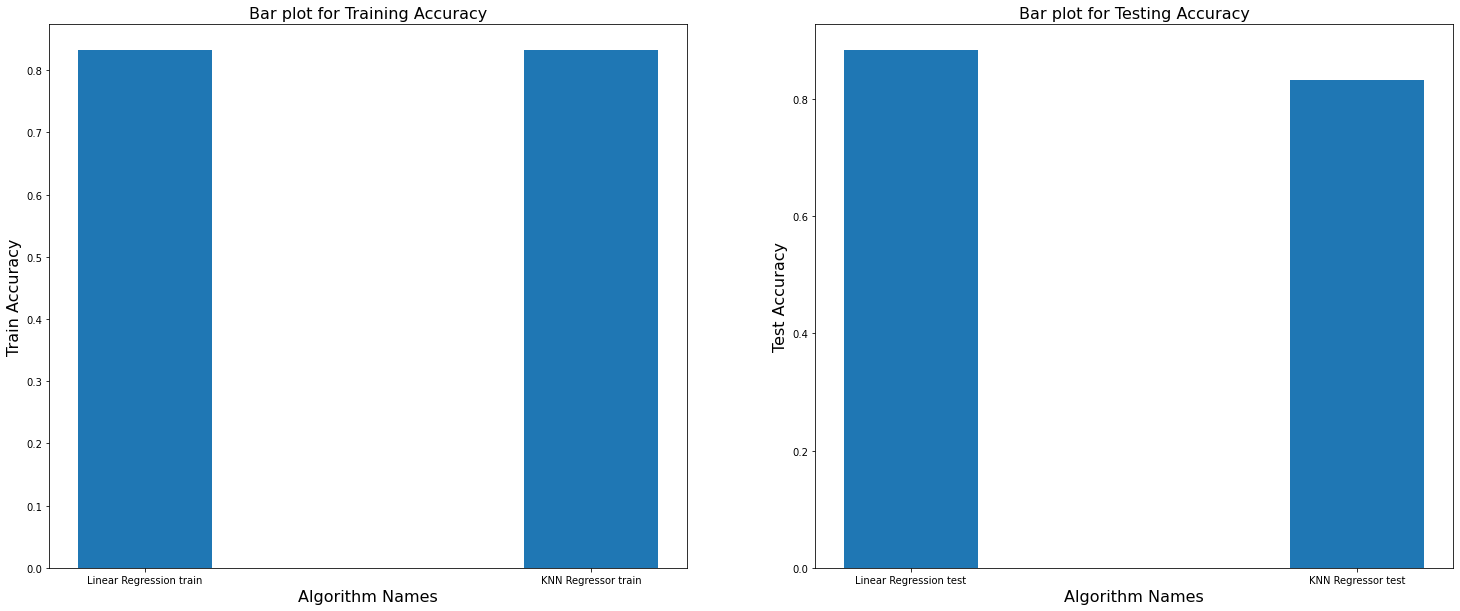

In [80]:
algorithms_comparison(model_1_train_names, model_1_algo_train_score, model_1_test_names, model_1_algo_test_score)

### Model 2 Algorithms Comparison:

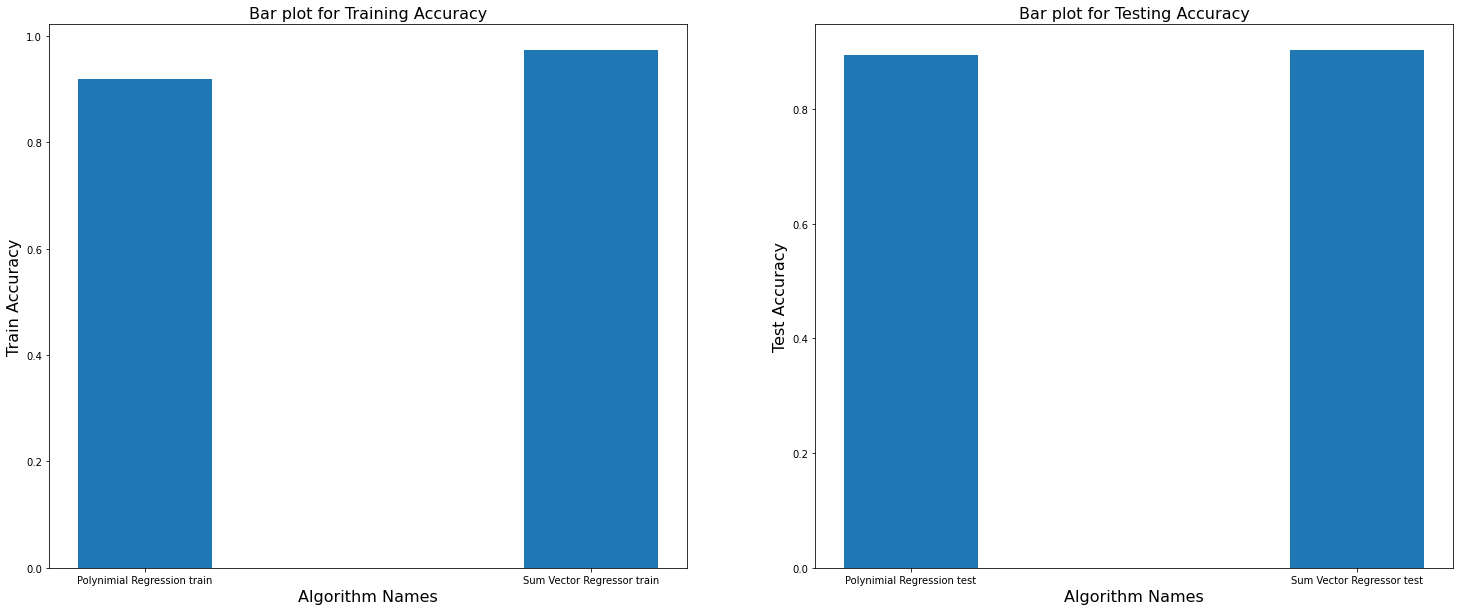

In [81]:
algorithms_comparison(model_2_train_names, model_2_algo_train_score, model_2_test_names, model_2_algo_test_score)

### Model 3 Algorithms Comparison:

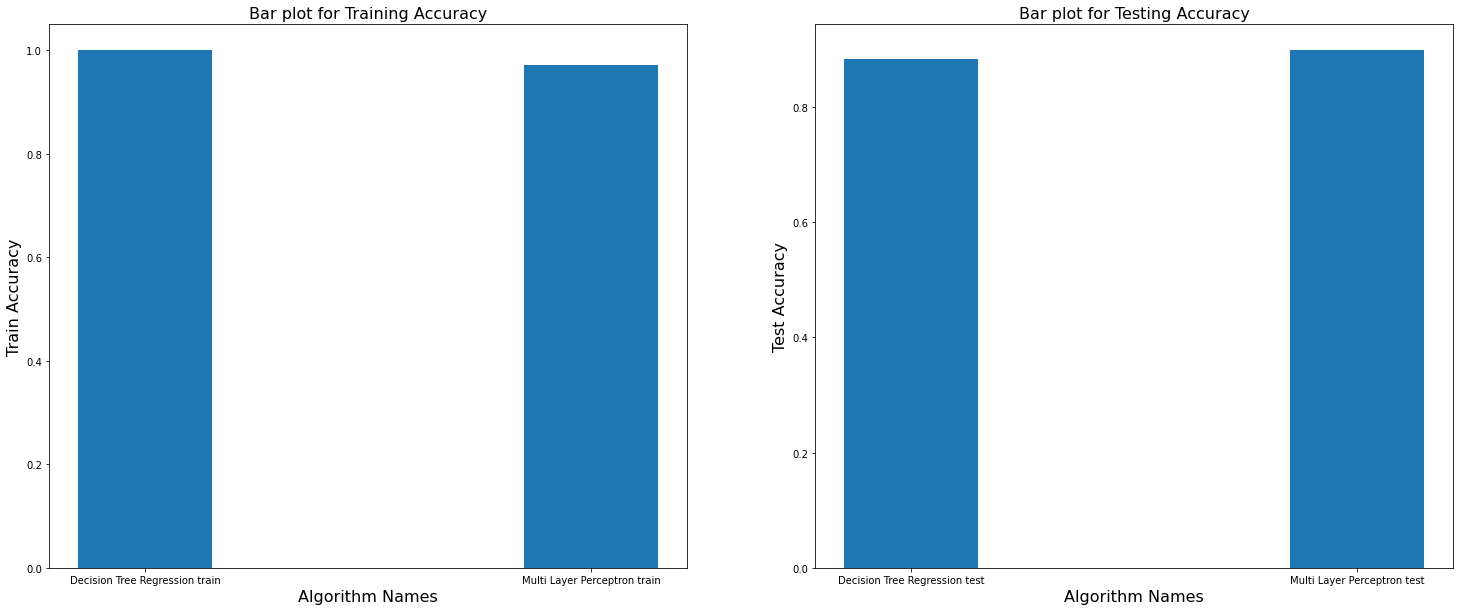

In [82]:
algorithms_comparison(model_3_train_names, model_3_algo_train_score, model_3_test_names, model_3_algo_test_score)

In [83]:
combine_models_train_names = np.append(model_1_train_names, (model_2_train_names, model_3_train_names))
combine_models_train_score = np.append(model_1_algo_train_score, (model_2_algo_train_score, model_3_algo_train_score))
combine_models_test_names = np.append(model_1_test_names, (model_2_test_names, model_3_test_names))
combine_models_test_score = np.append(model_1_algo_test_score, (model_2_algo_test_score, model_3_algo_test_score))

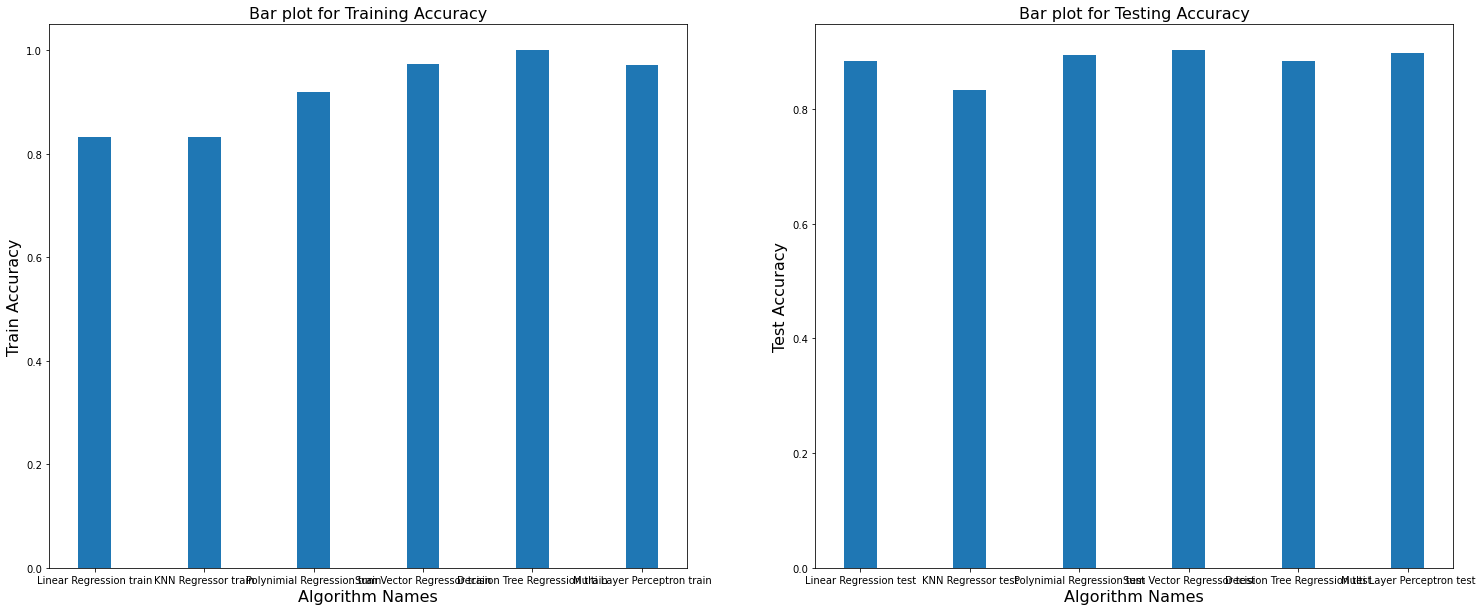

In [84]:
algorithms_comparison(combine_models_train_names, combine_models_train_score, combine_models_test_names, combine_models_test_score)

In [85]:
model_1_algo_1_accuracy_compare = np.array([model_0_train_score, model_0_test_score])
model_1_algo_2_accuracy_compare = np.array([model_01_train_score, model_01_test_score])
model_2_algo_1_accuracy_compare = np.array([model_02_train_score, model_02_test_score])

model_2_modified_algo_1_accuracy_compare = np.array([model_02_modified_train_score, model_02_modified_test_score])

model_2_algo_2_accuracy_compare = np.array([model_03_train_score, model_03_test_score])
model_3_algo_1_accuracy_compare = np.array([model_04_train_score, model_04_test_score])

model_3_modified_algo_1_accuracy_compare = np.array([model_04_modified_train_score, model_04_modified_test_score])

model_3_algo_2_accuracy_compare = np.array([model_05_train_score, model_05_test_score])

model_1_algo_1 = np.array(['Linear Regression train', 'Linear Regression test'])
model_1_algo_2 = np.array(['KNN Regressor train', 'KNN Regressor test'])
model_2_algo_1 = np.array(['Polynimial Regression train', 'Polynimial Regression test'])
model_2_algo_2 = np.array(['Sum Vector Regressor train', 'Sum Vector Regressor test'])
model_3_algo_1 = np.array(['Decision Tree Regression train', 'Decision Tree Regression test'])
model_3_algo_2 = np.array(['Multi Layer Perceptron train', 'Multi Layer Perceptron test'])

algo_to_use = np.array(['Linear Regression', 'KNN Regressor', 'Polynimial Regression',
                          'Sum Vector Regressor', 'Decision Tree Regression', 'Multi Layer Perceptron'])

In [86]:
# This function will plot training and testing score of algorithms of their respective models (training and testing score of algorithm in a Single graph).

def algorithms_train_test_accuracy_compare (model_algo_1, model_algo_1_acc, model_algo_2, model_algo_2_acc,algo_used, first_index, second_index):
    plt.figure(figsize = (4, 10))
    plt.subplot(1, 2, 1)
    plt.bar(model_algo_1, model_algo_1_acc, width = 0.3)
    plt.xlabel(algo_used[first_index], fontsize = 16)
    plt.ylabel('Accuracy', fontsize = 16)
    plt.title('Bar plot for 1\'ST Algorithm', fontsize = 16)
    
    plt.subplot(1, 2, 2)
    plt.bar(model_algo_2, model_algo_2_acc, width = 0.3)
    plt.xlabel(algo_used[second_index], fontsize = 16)
    plt.ylabel('Accuracy', fontsize = 16)
    plt.title('Bar plot for 2\'ND Algorithm', fontsize = 16)
    
    plt.subplots_adjust(right = 5)
    plt.show()

### Model 1:

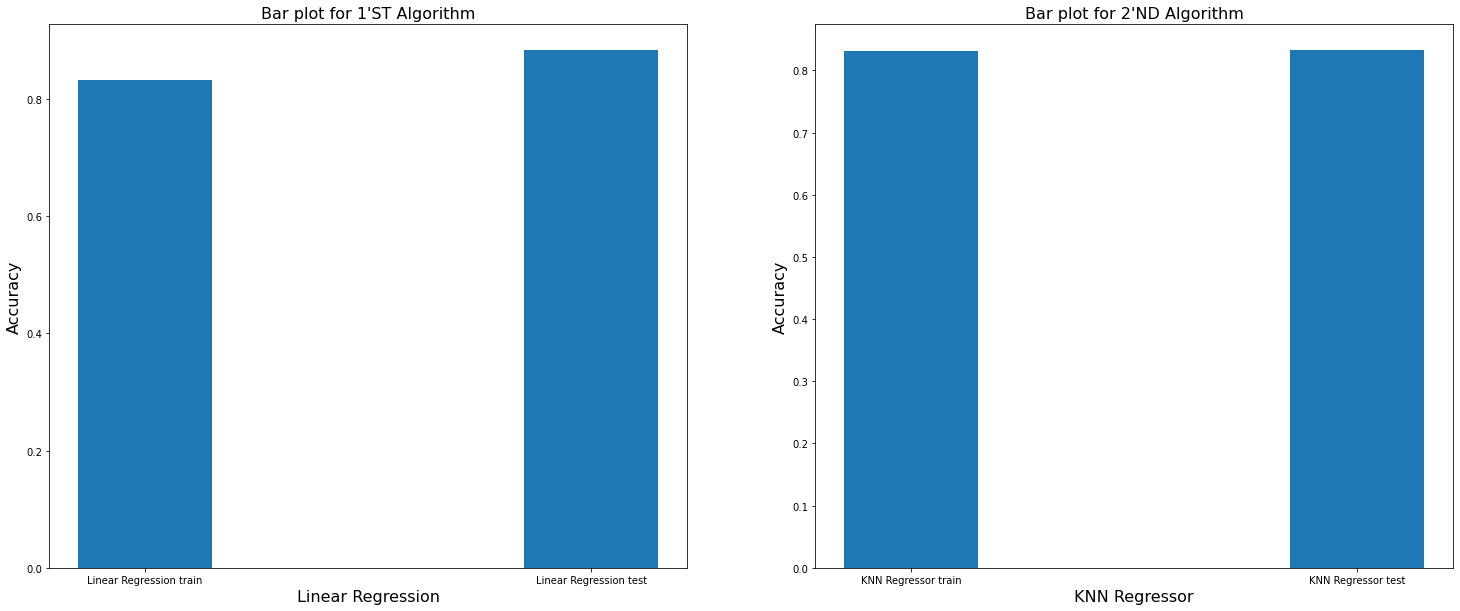

In [87]:
algorithms_train_test_accuracy_compare(model_1_algo_1, model_1_algo_1_accuracy_compare, model_1_algo_2, model_1_algo_2_accuracy_compare,algo_to_use, 0, 1)

### Model 2:

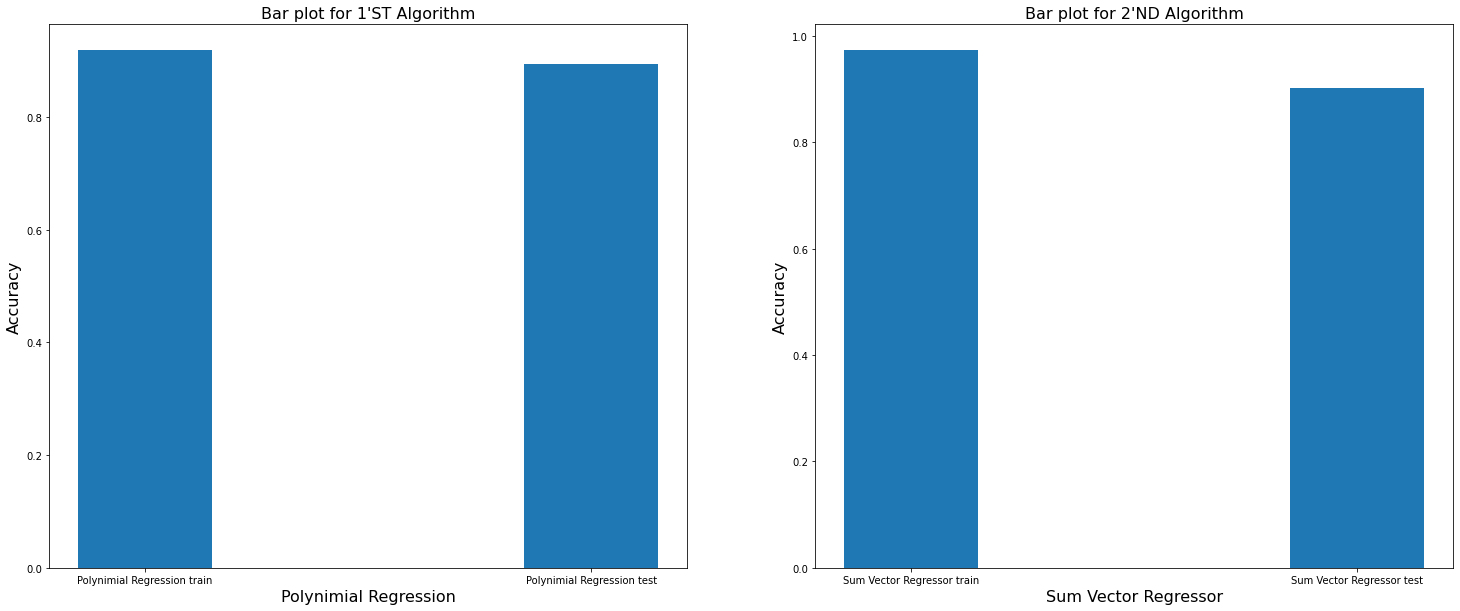

In [88]:
algorithms_train_test_accuracy_compare(model_2_algo_1, model_2_modified_algo_1_accuracy_compare, model_2_algo_2, model_2_algo_2_accuracy_compare,algo_to_use, 2, 3)

### Model 3:

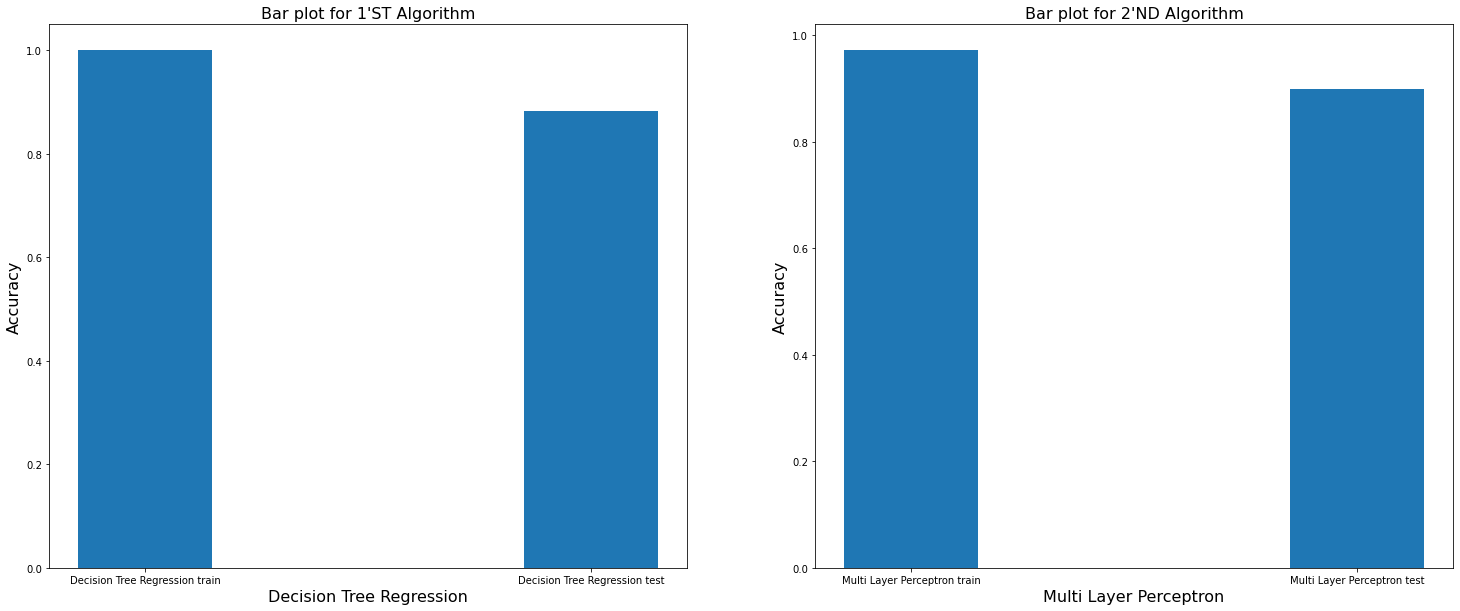

In [89]:
algorithms_train_test_accuracy_compare(model_3_algo_1, model_3_modified_algo_1_accuracy_compare, model_3_algo_2, model_3_algo_2_accuracy_compare,algo_to_use, 4, 5)

## Plotting Error Graph:

Importing OrderedDict from collections library. OrderedDict will remove duplicate items from list.
Reason behind using this library is if somehow any algorithm has been ran more than once, their error value will still append in error's list so, we have to those error's value if that specific algorithm ran more than once.

In [90]:
mean_square_error = list(OrderedDict.fromkeys(mean_square_error))
root_mean_square_error = list(OrderedDict.fromkeys(root_mean_square_error))
mean_abs_error = list(OrderedDict.fromkeys(mean_abs_error))

In [91]:
error_functions_used = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error']

In [92]:
def error_graph(which_error, error_name, index):
    plt.figure(figsize = (15,5))
    plt.bar(algo_to_use, which_error, width = 0.3)
    plt.xlabel('Algorithm Names', fontsize = 16)
    plt.ylabel('Error values', fontsize = 16)
    plt.title(error_name[index], fontsize = 16)
    plt.show()

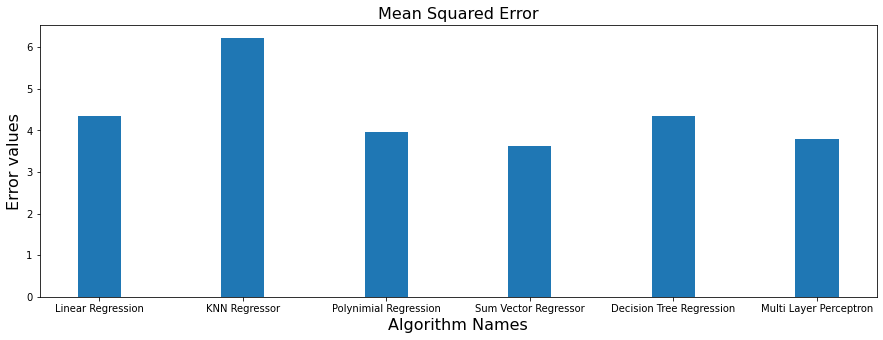

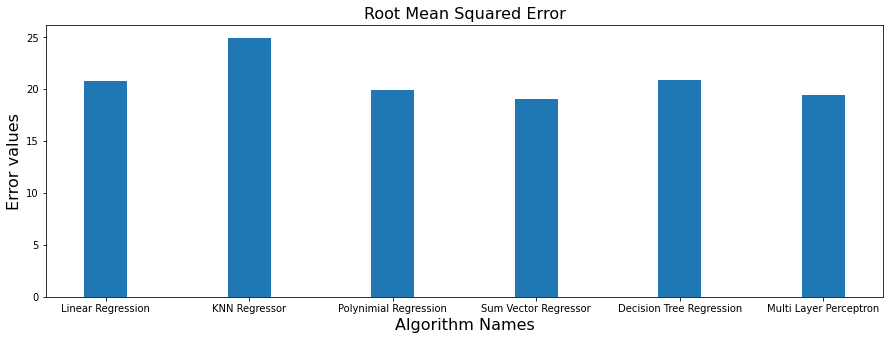

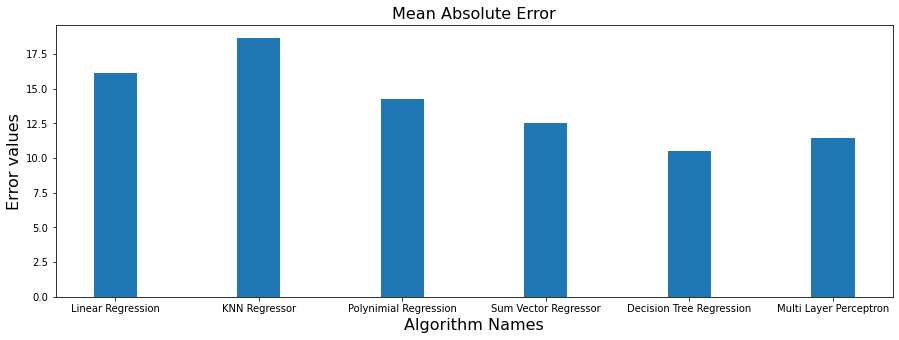

In [93]:
error_graph(mean_square_error, error_functions_used, 0)
error_graph(root_mean_square_error, error_functions_used, 1)
error_graph(mean_abs_error, error_functions_used, 2)

##### Now plotting Decision Tree and Polynomial Regression which got the overfitting case and after reducing/ avoiding it.

In [94]:
algo_with_modification = ['Polynomial Regression', 'Polynomial Regression Regularized',
                         'Decision Tree Regressor', 'Decisoin Tree with Random Forest']

# Polynomial Comparison:

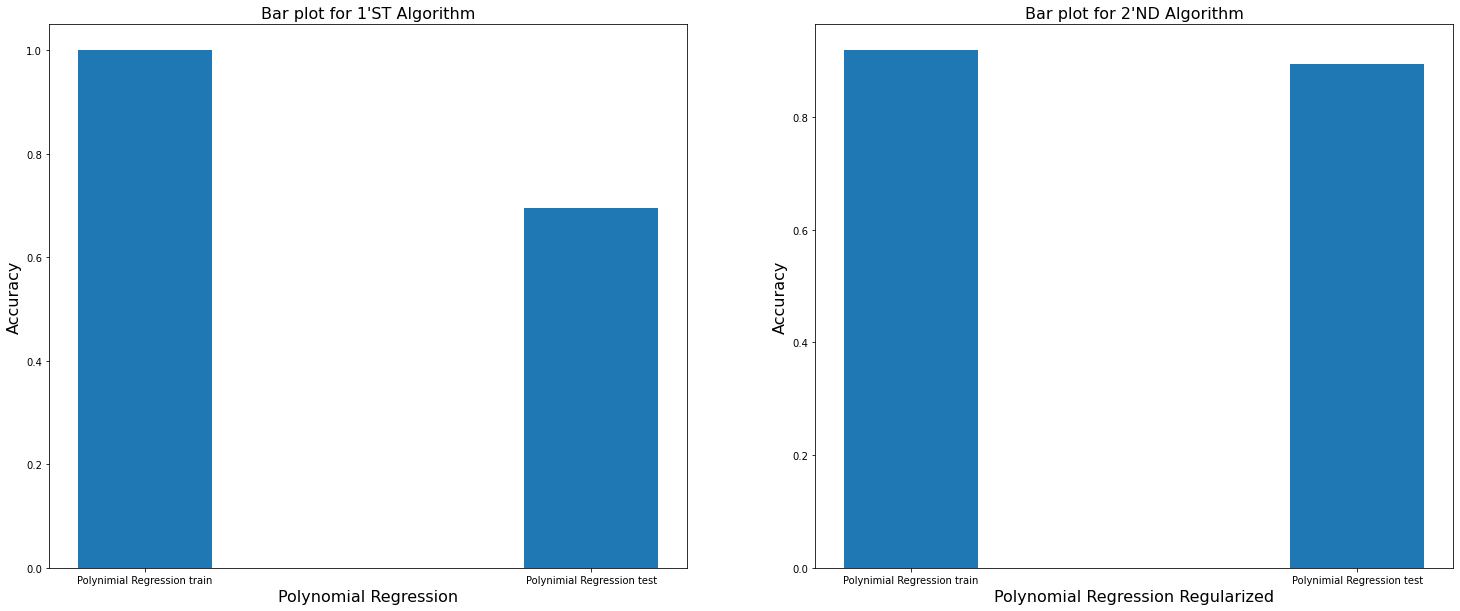

In [95]:
algorithms_train_test_accuracy_compare(model_2_algo_1, model_2_algo_1_accuracy_compare, model_2_algo_1, model_2_modified_algo_1_accuracy_compare,algo_with_modification, 0, 1)

# Decision Tree Comparison:

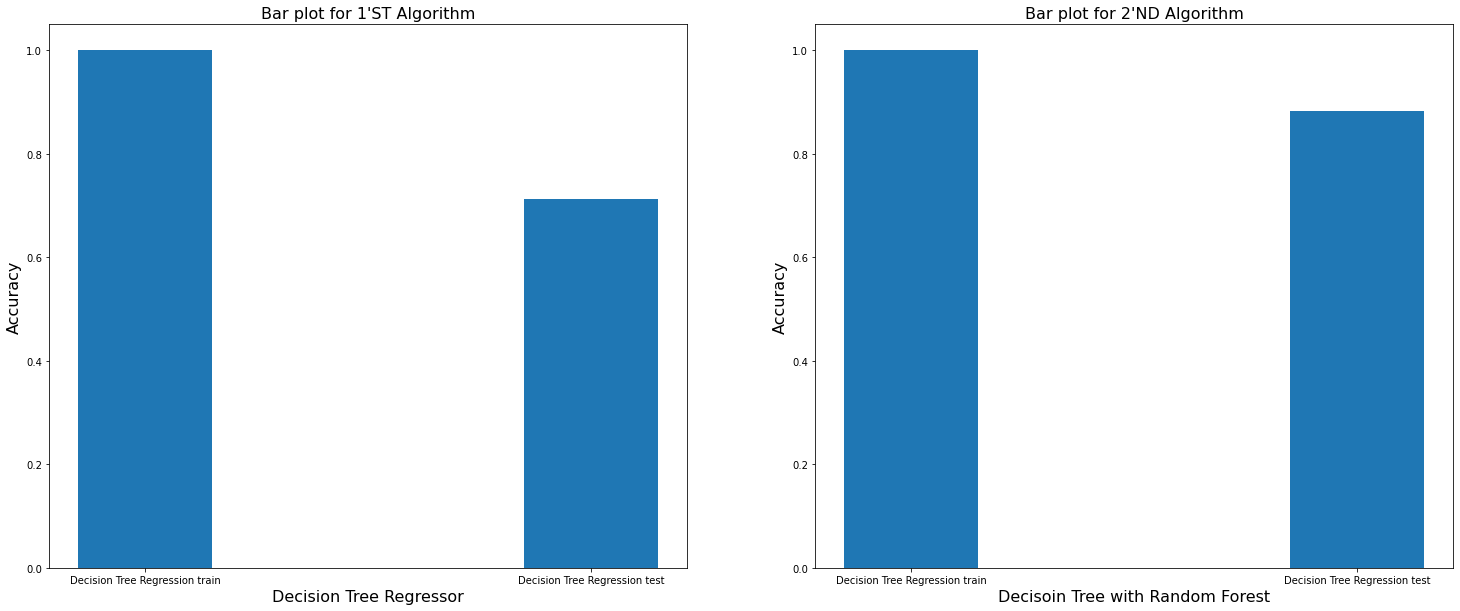

In [96]:
algorithms_train_test_accuracy_compare(model_3_algo_1, model_3_algo_1_accuracy_compare, model_3_algo_1, model_3_modified_algo_1_accuracy_compare,algo_with_modification, 2, 3)